# <u>Take Care of Your Employees</u>

Employees
Take care of your employees: A drastic thing happened and ABCXYZ123 Technical Solutions have lost one of their important employees. The company is now very concerned about the health of their employees and would want you to find that set of employees who are in need or may be in need of treatment, taking into account multiple attributes that are already stored in the database. So buckle up the wellness of your employees is in your hand.

<u>The objective of the problem:</u>

The objective is to predict values “treatment” attribute from the given features of the Test data.

The predictions are to be written to a CSV file along with ID which is the unique identifier for each tuple.
Please upload the submission file to get a score.
Please note that the training data is only for creating your data model and all predictions are to be made as per serial numbers on the test file.

<u>The description of the data attributes is as below:</u>

    • Timestamp
    • Age
    • Gender
    • Country
    • state: If you live in the United States, which state or territory do you live in?
    • self_employed: Are you self-employed?
    • family_history: Do you have a family history of mental illness?
    • treatment: Does he or she really needs treatment.
    • work_interfere: If you have a mental health condition, do you feel that it interferes with your work?
    • no_employees: How many employees does your company or organization have?
    • remote_work: Do you work remotely (outside of an office) at least 50% of the time?
    • tech_company: Is your employer primarily a tech company/organization?
    • benefits: Does your employer provide mental health benefits?
    • care_options: Do you know the options for mental health care your employer provides?
    • wellness_program: Has your employer ever discussed mental health as part of an employee wellness program?
    • seek_help: Does your employer provide resources to learn more about mental health issues and how to seek help?
    • anonymity: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?
    • leave: How easy is it for you to take medical leave for a mental health condition?
    • mental_health_consequence: Do you think that discussing a mental health issue with your employer would have negative consequences?
    • phys_health_consequence: Do you think that discussing a physical health issue with your employer would have negative consequences?
    • coworkers: Would you be willing to discuss a mental health issue with your coworkers?
    • supervisor: Would you be willing to discuss a mental health issue with your direct supervisor(s)?
    • mental_health_interview: Would you bring up a mental health issue with a potential employer in an interview?
    • phys_health_interview: Would you bring up a physical health issue with a potential employer in an interview?
    • mental_vs_physical: Do you feel that your employer takes mental health as seriously as physical health?
    • obs_consequence: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?
    • comments: Any additional notes or comments.

<u>Load Basic Libraries</u>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# To display maximum columns
pd.set_option("display.max_columns",None)

<u>Load the csv files into dataframe</u>

In [2]:
train_df = pd.read_csv(r'https://raw.githubusercontent.com/nikunj-gada/Employee-Mental-Illness-Treatment-Prediction/master/Dataset/training_.csv', header = 0, index_col = 0)
test_df = pd.read_csv(r'https://raw.githubusercontent.com/nikunj-gada/Employee-Mental-Illness-Treatment-Prediction/master/Dataset/test.csv', header = 0, index_col = 0)

# creating a copy of original df
train_copy = train_df.copy()
test_copy = test_df.copy()

In [3]:
print('Shape : ',train_df.shape)
train_df.head()

Shape :  (1048, 27)


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
S.No,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
2,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
3,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
4,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
5,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [4]:
print('Shape : ',test_df.shape)
test_df.head()

Shape :  (210, 26)


,Timestamp,Age,Gender,Country,state,self_employed,family_history,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
S.No,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2014-08-29 11:32:22,39,Male,United Kingdom,NaN,Yes,Yes,Sometimes,1-5,Yes,Yes,No,Yes,Yes,Yes,Yes,Somewhat difficult,No,No,Yes,Yes,No,Maybe,Yes,Yes,These result may be a tad confusing so a summa...
2,2014-08-29 11:32:44,26,female,United States,WA,No,Yes,Sometimes,More than 1000,No,Yes,Yes,Yes,No,No,Don't know,Don't know,No,No,Some of them,Yes,No,Maybe,No,Yes,I should note one of the places my employer fa...
3,2014-08-29 11:33:54,23,Female,United States,IL,No,Yes,Sometimes,26-100,No,No,No,No,No,No,Don't know,Somewhat difficult,Yes,No,No,Some of them,No,Maybe,No,No,NaN
4,2014-08-29 11:34:07,35,Male,Switzerland,NaN,No,Yes,Often,More than 1000,No,Yes,Don't know,Not sure,No,No,Yes,Very easy,No,No,Some of them,Some of them,No,Maybe,No,No,NaN
5,2014-08-29 11:36:38,36,Male,United States,FL,No,No,Never,1-5,Yes,Yes,Don't know,Not sure,Don't know,Don't know,Don't know,Very easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN


### Pre-processing the data

<u>Let us check the data frame description</u>

In [5]:
train_df.describe(include = 'all')

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
count,1048,1.048000e+03,1048,1048,636,1030,1048,1048,812,1048,1048,1048,1048,1048,1048,1048,1048,1048,1048,1048,1048,1048,1048,1048,1048,1048,132
unique,1035,NaN,45,42,45,2,2,2,4,6,2,2,3,3,3,3,3,5,3,3,3,3,3,3,3,2,128
top,2014-08-27 15:24:47,NaN,Male,United States,CA,No,No,No,Sometimes,6-25,No,Yes,Yes,No,No,No,Don't know,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No,* Small family business - YMMV.
freq,2,NaN,518,644,123,906,643,536,386,245,733,870,400,422,692,534,685,466,424,773,651,439,835,461,471,902,5
mean,NaN,9.541988e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,3.089010e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,-1.726000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2.700000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,3.100000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,3.600000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
test_df.describe(include = 'all')

,Timestamp,Age,Gender,Country,state,self_employed,family_history,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
count,210,210.000000,210,210,107,210,210,182,210,210,210,210,210,210,210,210,210,210,210,210,210,210,210,210,210,32
unique,210,NaN,14,29,23,2,2,4,6,2,2,3,3,3,3,3,5,3,3,3,3,3,3,3,2,32
top,2014-08-29 18:39:07,NaN,Male,United States,CA,No,No,Sometimes,More than 1000,No,Yes,Yes,Yes,No,No,Don't know,Don't know,Maybe,No,Some of them,Yes,No,Maybe,Don't know,No,The data will be skewed for self-employed peop...
freq,1,NaN,96,106,15,189,123,79,55,150,161,77,80,150,112,134,97,97,151,122,77,172,96,105,173,1
mean,NaN,32.547619,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,8.061968,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,27.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,32.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,37.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Due to lot of columns we shall check for unique values later as descibe function isnt helping

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048 entries, 1 to 1048
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1048 non-null   object
 1   Age                        1048 non-null   int64 
 2   Gender                     1048 non-null   object
 3   Country                    1048 non-null   object
 4   state                      636 non-null    object
 5   self_employed              1030 non-null   object
 6   family_history             1048 non-null   object
 7   treatment                  1048 non-null   object
 8   work_interfere             812 non-null    object
 9   no_employees               1048 non-null   object
 10  remote_work                1048 non-null   object
 11  tech_company               1048 non-null   object
 12  benefits                   1048 non-null   object
 13  care_options               1048 non-null   object
 14  wellness

In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210 entries, 1 to 210
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  210 non-null    object
 1   Age                        210 non-null    int64 
 2   Gender                     210 non-null    object
 3   Country                    210 non-null    object
 4   state                      107 non-null    object
 5   self_employed              210 non-null    object
 6   family_history             210 non-null    object
 7   work_interfere             182 non-null    object
 8   no_employees               210 non-null    object
 9   remote_work                210 non-null    object
 10  tech_company               210 non-null    object
 11  benefits                   210 non-null    object
 12  care_options               210 non-null    object
 13  wellness_program           210 non-null    object
 14  seek_help 

- From above we do see that we have missing values in both the data frames. Let us check for missing values

<u>Checking for null values</u>

In [9]:
print('Training Data : \n')
train_df.isnull().sum()

Training Data : 



Timestamp                      0
Age                            0
Gender                         0
Country                        0
state                        412
self_employed                 18
family_history                 0
treatment                      0
work_interfere               236
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
comments                     916
dtype: int64

In [10]:
print('Testing Data : \n')
test_df.isnull().sum()

Testing Data : 



Timestamp                      0
Age                            0
Gender                         0
Country                        0
state                        103
self_employed                  0
family_history                 0
work_interfere                28
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
comments                     178
dtype: int64

##### <u>Training Data :</u>
        -In this dataset we see that 'state' , 'self_employed', 'work_interfere' & 'comments' are the columns having missing values.
##### <u>Testing Data :</u>
        -In this dataset we see that 'state', 'work_interfere' & 'comments' are the columns having missing values.
        
        
- As our problem statement is predicting whether 'treatment' is required or not, we see that 'comments' will not play an important role as it basically explains the employee's choices of answering and is not helpoing on the target variable      
- The state column (state: If you live in the United States, which state or territory do you live in?) basically is applicable for USA and not other countries. So as part of feature selection we shall drop the column
- As per above statements, we only need to handle missing values for 'self_employed' & 'work_interfere' in this dataset

In [11]:
print(test_df['work_interfere'].unique())
train_df['work_interfere'].unique()

['Sometimes' 'Often' 'Never' 'Rarely' nan]


array(['Often', 'Rarely', 'Never', 'Sometimes', nan], dtype=object)

In [12]:
print(test_df['self_employed'].unique())
train_df['self_employed'].unique()

['Yes' 'No']


array([nan, 'Yes', 'No'], dtype=object)

- We see that work_interface is an Ordinal data having categories. So we shall handle the null values by adding a category called Dont know similar to what we see in the leave column

- As self_employed is a binary classification categorical data we shall replace it with the MODE value

In [13]:
print('self_employed => trainData:: will be replaced by Mode and value is ',train_df['self_employed'].mode()[0])
print('work_interfere => trainData:: will be replaced by Don\'t know')
train_df['self_employed'].fillna(train_df['self_employed'].mode()[0], inplace = True)
train_df['work_interfere'].fillna("Don't know", inplace = True)

self_employed => trainData:: will be replaced by Mode and value is  No
work_interfere => trainData:: will be replaced by Don't know


In [14]:
test_df['self_employed'].fillna(test_df['self_employed'].mode()[0], inplace = True)
test_df['work_interfere'].fillna("Don't know", inplace = True)

In [15]:
print('Trainng dataset :\n',train_df.isnull().sum())
print('\nTesting dataset : \n',test_df.isnull().sum())

Trainng dataset :
 Timestamp                      0
Age                            0
Gender                         0
Country                        0
state                        412
self_employed                  0
family_history                 0
treatment                      0
work_interfere                 0
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
comments                     916
dtype: int64

Testing dataset : 
 Timestamp                      0
Age                    

- We have imputed the desired columns

- now before we move ahead, let us drop the columns as decided in the above step

Columns to be droped :

        - Timestamp :: As per the problem statement, it is not a significant value
        - Country :: As per the problem statement, it is not a significant value. Also if we keep it we may have issues with encoding. If we go with one hot encoding we may have redundant columns. If we go with label encoder, we may falsely encode country as the data in training and testing dont match
        -State :: same as above
        -comments :: As per the problem statement, it is not a significant value

In [16]:
train_df.drop(['Timestamp','Country', 'state', 'comments'], axis = 1, inplace = True)
test_df.drop(['Timestamp', 'Country','state', 'comments'], axis = 1, inplace = True)
print('Training dataset after droping columns -',train_df.shape)
print('Testing dataset after droping columns -',test_df.shape)

Training dataset after droping columns - (1048, 23)
Testing dataset after droping columns - (210, 22)


In [17]:
train_df.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
S.No,,,,,,,,,,,,,,,,,,,,,,,
1,37,Female,No,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
2,44,M,No,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
3,32,Male,No,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
4,31,Male,No,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
5,31,Male,No,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [18]:
test_df.head()

,Age,Gender,self_employed,family_history,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
S.No,,,,,,,,,,,,,,,,,,,,,,
1,39,Male,Yes,Yes,Sometimes,1-5,Yes,Yes,No,Yes,Yes,Yes,Yes,Somewhat difficult,No,No,Yes,Yes,No,Maybe,Yes,Yes
2,26,female,No,Yes,Sometimes,More than 1000,No,Yes,Yes,Yes,No,No,Don't know,Don't know,No,No,Some of them,Yes,No,Maybe,No,Yes
3,23,Female,No,Yes,Sometimes,26-100,No,No,No,No,No,No,Don't know,Somewhat difficult,Yes,No,No,Some of them,No,Maybe,No,No
4,35,Male,No,Yes,Often,More than 1000,No,Yes,Don't know,Not sure,No,No,Yes,Very easy,No,No,Some of them,Some of them,No,Maybe,No,No
5,36,Male,No,No,Never,1-5,Yes,Yes,Don't know,Not sure,Don't know,Don't know,Don't know,Very easy,No,No,Some of them,Some of them,No,No,Don't know,No


- Now Let us check if the data in the datasets have proper categorical values, so that we can encode them later during model building

The below fucntion is basicallyto loop columns and print each columns unique values so that we have a clear picture for all columns

In [19]:
def print_unique_values(df):
    for colname in df.columns:
        if df[colname].dtype == 'object' or df[colname].dtype == 'int64':
            print('--------- {} -----------'.format(colname))
            print(np.sort(df[colname].unique()),'\nCount ::', df[colname].nunique(),'\n')

In [20]:
print_unique_values(train_df)

print(' **************** Testing Data starts here ***************')
print_unique_values(test_df)

--------- Age -----------
[      -1726         -29           5           8          18          19
          20          21          22          23          24          25
          26          27          28          29          30          31
          32          33          34          35          36          37
          38          39          40          41          42          43
          44          45          46          47          48          49
          50          51          53          54          55          56
          57          58          60          61          62          65
         329 99999999999] 
Count :: 50 

--------- Gender -----------
['A little about you' 'Agender' 'All' 'Androgyne' 'Cis Female' 'Cis Male'
 'Enby' 'F' 'Femake' 'Female' 'Female ' 'Female (cis)' 'Female (trans)'
 'Genderqueer' 'Guy (-ish) ^_^' 'M' 'Mail' 'Make' 'Mal' 'Male' 'Male '
 'Male (CIS)' 'Male-ish' 'Malr' 'Man' 'Nah' 'Neuter' 'Trans woman'
 'Trans-female' 'Woman' 'cis male' '

    - --------- Gender -----------
    ['A little about you' 'Agender' 'All' 'Androgyne' 'Cis Female' 'Cis Male'
     'Enby' 'F' 'Femake' 'Female' 'Female ' 'Female (cis)' 'Female (trans)'
     'Genderqueer' 'Guy (-ish) ^_^' 'M' 'Mail' 'Make' 'Mal' 'Male' 'Male '
     'Male (CIS)' 'Male-ish' 'Malr' 'Man' 'Nah' 'Neuter' 'Trans woman'
     'Trans-female' 'Woman' 'cis male' 'cis-female/femme' 'f' 'female' 'fluid'
     'm' 'maile' 'male' 'male leaning androgynous' 'msle' 'non-binary' 'queer'
     'queer/she/they' 'something kinda male?' 'woman'] 
    Count :: 45 
        -
        - As we see There is a data mismatch in the Gender column.
        - We shall replace all values of male by m, Female by f and other data as o representing others

    --------- Age -----------
    [      -1726         -29           5           8          18          19
              20          21          22          23          24          25
              26          27          28          29          30          31
              32          33          34          35          36          37
              38          39          40          41          42          43
              44          45          46          47          48          49
              50          51          53          54          55          56
              57          58          60          61          62          65
             329 99999999999] 
    Count :: 50  

        - We also see that age has negative values and values above 100 as well for an employee

- In the testing data we see the same as we saw in the training data for Age and Gender

---------------------------------------------------------------------------------    
    Replacing the Traing data for Gender
    
    ['A little about you' 'Agender' 'All' 'Androgyne' 'Cis Female' 'Cis Male'
         'Enby' 'F' 'Femake' 'Female' 'Female ' 'Female (cis)' 'Female (trans)'
         'Genderqueer' 'Guy (-ish) ^_^' 'M' 'Mail' 'Make' 'Mal' 'Male' 'Male '
         'Male (CIS)' 'Male-ish' 'Malr' 'Man' 'Nah' 'Neuter' 'Trans woman'
         'Trans-female' 'Woman' 'cis male' 'cis-female/femme' 'f' 'female' 'fluid'
         'm' 'maile' 'male' 'male leaning androgynous' 'msle' 'non-binary' 'queer'
         'queer/she/they' 'something kinda male?' 'woman'] 
         
         
 ---------------------------------------------------------------------------------    
    Replacing the Test data for Gender
    
    ['Cis Man' 'F' 'Female' 'M' 'Male' 'Male ' 'Woman' 'f' 'femail' 'female' 'm' 'male' 'ostensibly male, unsure what that really means' 'p'] 

In [21]:
# Female :: F
train_df['Gender'] = train_df['Gender'].replace(['Cis Female','F', 'Femake', 'Female', 'Female ', 'Female (cis)','Woman', 'cis-female/femme', 'f', 'female', 'woman', 'femail'],'F')
test_df['Gender'] = test_df['Gender'].replace(['F', 'Female','Woman', 'f', 'femail', 'female'], 'F')

# Male :: M
train_df['Gender'] = train_df['Gender'].replace(['Cis Male', 'M', 'Mail', 'Make', 'Mal', 'Male', 'Male ','Male (CIS)', 'Male-ish', 'Malr', 'Man','cis male', 'Cis Man', 'm', 'maile', 'male', 'msle', 'something kinda male?','ostensibly male, unsure what that really means'],'M')
test_df['Gender'] = test_df['Gender'].replace(['Cis Man', 'M', 'Male', 'Male ', 'm', 'male', 'ostensibly male, unsure what that really means'], 'M')

#Others :: O
train_df['Gender'] = train_df['Gender'].replace(['A little about you', 'Agender' ,'All', 'Androgyne','Enby','Female (trans)', 'Genderqueer', 'p', 'Guy (-ish) ^_^', 'Nah', 'Neuter', 'Trans woman', 'Trans-female', 'fluid', 'male leaning androgynous', 'non-binary', 'queer', 'queer/she/they'],'O')
test_df['Gender'] = test_df['Gender'].replace(['p'], 'O')

In [22]:
print('Unique value for Gender in Training :',train_df['Gender'].unique())
print(train_df['Gender'].value_counts())
print('\nUnique value for Gender in Testing  :',test_df['Gender'].unique())
print(test_df['Gender'].value_counts())

Unique value for Gender in Training : ['F' 'M' 'O']
M    828
F    202
O     18
Name: Gender, dtype: int64

Unique value for Gender in Testing  : ['M' 'F' 'O']
M    164
F     45
O      1
Name: Gender, dtype: int64


--------------------------------------------------------------------
Working on the Age part

    Training data
    --------- Age -----------
    [      -1726         -29           5           8          18          19
              20          21          22          23          24          25
              26          27          28          29          30          31
              32          33          34          35          36          37
              38          39          40          41          42          43
              44          45          46          47          48          49
              50          51          53          54          55          56
              57          58          60          61          62          65
             329 99999999999] 
    Count :: 50  

#####   [Country wise retirement age](https://en.wikipedia.org/wiki/Retirement_age)
#####        - As per the wiki link we see that the 65 is the upper limit of employee working in most country. So we shall filter out this column  and Impute the courrupted values with Mean  

In [23]:
# Fetching the mean of ages from valid values and not false values
train_age_mean = int(train_df[(train_df['Age'] <= 65) & (train_df['Age'] >= 18)].Age.mean())
test_age_mean = int(test_df[(test_df['Age'] <= 65) & (test_df['Age'] >= 18)].Age.mean())

In [24]:
# Looping using labda to replace false values with their mean
# Syntax dataFrame.apply(lambda x : [value if condition true] if [condition] else [value for condition false])
train_df['Age'] = train_df['Age'].apply(lambda x: train_age_mean if (x < 18 or x > 65) else x)
test_df['Age'] = test_df['Age'].apply(lambda x: test_age_mean if (x < 18 or x > 65) else x)

- We have replaced the age value which were not in significant range by the mean values

Checking min and max values for age

In [25]:
train_df.Age.describe()

count    1048.000000
mean       31.916031
std         7.195364
min        18.000000
25%        27.000000
50%        31.000000
75%        36.000000
max        65.000000
Name: Age, dtype: float64

In [26]:
test_df.Age.describe()

count    210.000000
mean      32.614286
std        7.066924
min       20.000000
25%       27.000000
50%       32.000000
75%       37.000000
max       60.000000
Name: Age, dtype: float64

- We see that we have successfully imputed the values by looking at the min and max value

#### <u>Encoding the train and test data for model building</u>

- We shall encode the categorical data using labelEncoder

In [27]:
# separating the target variable from train data
train_df_Y = train_df['treatment']
train_df.drop(['treatment'], axis = 1, inplace = True)

In [28]:
# Performing this step to get the value of target variable at the end of dataframe for my ease
train_df['treatment'] = train_df_Y

In [29]:
# For preprocessing the data
from sklearn.preprocessing import LabelEncoder

encoder_label = LabelEncoder()

for col_name in test_df.columns:
    if train_df[col_name].dtype == 'object':
        train_df[col_name] = encoder_label.fit_transform(train_df[col_name])
        test_df[col_name] = encoder_label.fit_transform(test_df[col_name])

# Additional line as we iterated columns from test data and not from train data and treatment is not present in test data
train_df['treatment'] = encoder_label.fit_transform(train_df['treatment'])

In [30]:
train_df.head()

,Age,Gender,self_employed,family_history,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,treatment
S.No,,,,,,,,,,,,,,,,,,,,,,,
1,37,0,0,0,2,4,0,1,2,1,1,2,2,2,1,1,1,2,1,0,2,0,1
2,44,1,0,0,3,5,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0
3,32,1,0,0,3,4,0,1,1,0,1,1,0,1,1,1,2,2,2,2,1,0,0
4,31,1,0,1,2,2,0,1,1,2,1,1,1,1,2,2,1,0,0,0,1,1,1
5,31,1,0,0,1,1,1,1,2,0,0,0,0,0,1,1,1,2,2,2,0,0,0


In [31]:
test_df.head()

,Age,Gender,self_employed,family_history,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
S.No,,,,,,,,,,,,,,,,,,,,,,
1,39,1,1,1,4,0,1,1,1,2,2,2,2,1,1,1,2,2,1,0,2,1
2,26,0,0,1,4,5,0,1,2,2,1,1,0,0,1,1,1,2,1,0,1,1
3,23,0,0,1,4,2,0,0,1,0,1,1,0,1,2,1,0,1,1,0,1,0
4,35,1,0,1,2,5,0,1,0,1,1,1,2,4,1,1,1,1,1,0,1,0
5,36,1,0,0,1,0,1,1,0,1,0,0,0,4,1,1,1,1,1,1,0,0


In [32]:
col_list = test_df.columns
# creating a copy of the new df to be used later
train = train_df.copy()
test = test_df.copy()

### <u>Splitting the training data into X and Y</u>

In [33]:
X = train_df.iloc[:,0:-1]
Y = train_df.iloc[:,-1]

### <u>Scaling the Data</u>

In [34]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(X)
X= scaler.transform(X)

In [35]:
scaler.fit(test_df)
test_df = scaler.transform(test_df)

#### train_test_split started

In [36]:
# Splitting the data in 70:30
from sklearn.model_selection import train_test_split
#Split the data into test and train using stratified K-Fold 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=10, stratify = Y)  

As we notice above we have added the hyper parameter stratify :: which is basically stratified k-fold - it maintains the ratio of data for Yes and No present in the Y variable and can avoid overfitting in the model

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

- Below is a generic code block to print evaluation of the model

In [38]:
def evaluation(Y_test,Y_pred, plot_prediction):
    

    cfm=confusion_matrix(Y_test,Y_pred)
    print("Confusion Metrics :\n",cfm)

    print("\n")
    print(pd.crosstab(Y_test, Y_pred, rownames=['True'], colnames=['Predicted'], margins=True))
    
    print("\nClassification report: \n")

    print(classification_report(Y_test,Y_pred))

    acc=accuracy_score(Y_test, Y_pred) #
    print("\nAccuracy of the model: ",acc)
    print('\n----- YTest v Y pred (30 values)---------')
    print('YTest :',Y_test.values[0:31])
    print('YPred :',Y_pred[0:31])
  
    # To plot Actual v predicted for Visualization
    if plot_prediction :
        plt.figure(figsize=(25,6))
        plt.title('Y_test v Y_pred for first 40 values')
        plt.plot(Y_test.values[0:41], label='Actual', linestyle='--', marker='o', color='g')
        plt.plot(Y_pred[0:41], label='Predicted', linestyle='--', marker='o', color='r')
        plt.legend(prop={'size': 20})
        plt.show()

### Logistic Regression

Confusion Metrics :
 [[134  27]
 [ 25 129]]


Predicted    0    1  All
True                    
0          134   27  161
1           25  129  154
All        159  156  315

Classification report: 

              precision    recall  f1-score   support

           0       0.84      0.83      0.84       161
           1       0.83      0.84      0.83       154

    accuracy                           0.83       315
   macro avg       0.83      0.83      0.83       315
weighted avg       0.84      0.83      0.83       315


Accuracy of the model:  0.834920634920635

----- YTest v Y pred (30 values)---------
YTest : [0 1 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 1 0 1 1 1]
YPred : [0 0 1 0 1 0 0 0 1 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 0 0 1 1]


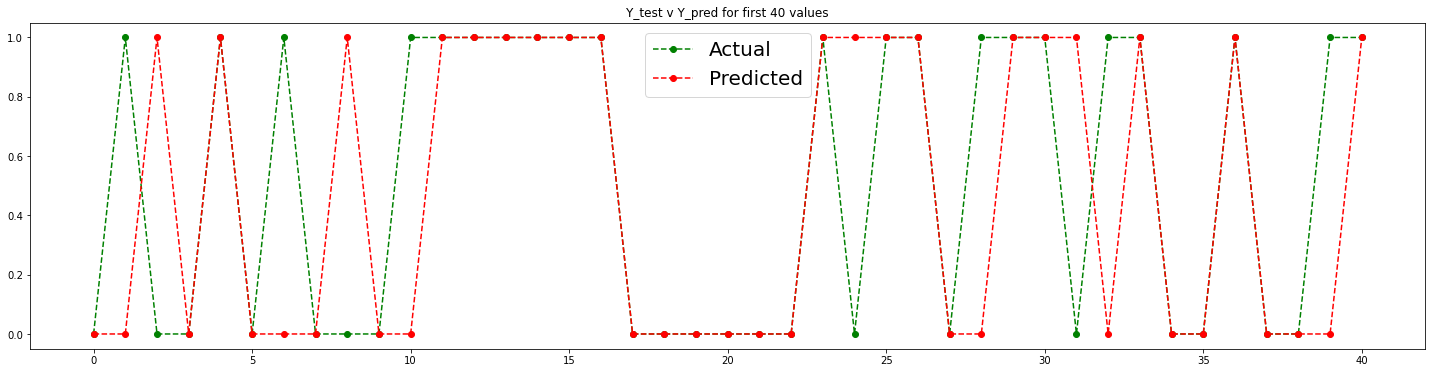

In [39]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
evaluation(Y_test,Y_pred, True)

#### Enhancing the logistic regression using SGDClassifier

In [40]:
sgd=SGDClassifier(loss="log",random_state=10,learning_rate="constant",eta0=0.000001,max_iter=2000, shuffle=True,
                        early_stopping=True,n_iter_no_change=5)

sgd.fit(X_train,Y_train)
Y_pred=sgd.predict(X_test)
evaluation(Y_test,Y_pred, False)

#print("Beta Values : \n",list(zip(train_df.columns[:-1],sgd.coef_.ravel())))
print('\nclassifier.intercept : ',sgd.intercept_)
print('\nEpoch ',sgd.n_iter_)

Confusion Metrics :
 [[127  34]
 [ 31 123]]


Predicted    0    1  All
True                    
0          127   34  161
1           31  123  154
All        158  157  315

Classification report: 

              precision    recall  f1-score   support

           0       0.80      0.79      0.80       161
           1       0.78      0.80      0.79       154

    accuracy                           0.79       315
   macro avg       0.79      0.79      0.79       315
weighted avg       0.79      0.79      0.79       315


Accuracy of the model:  0.7936507936507936

----- YTest v Y pred (30 values)---------
YTest : [0 1 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 1 0 1 1 1]
YPred : [0 0 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1 0 0 0 1 0 0 1 1 1 1 1 1 1 1]

classifier.intercept :  [-4.49848637e-05]

Epoch  6


- We see that Logistic has much more correct prediction than SGD

### KNN

In [41]:
neighbors = np.arange(1,50)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
my_dict = {}

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k, metric="manhattan")
    
    #Fit the model
    knn.fit(X_train, Y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, Y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, Y_test)
    
    #Predict 
    Y_pred = knn.predict(X_test)
    
    # Zipping Accuracy score
    my_dict[k]=accuracy_score(Y_test,Y_pred)
    
print(my_dict)

{1: 0.707936507936508, 2: 0.6603174603174603, 3: 0.7174603174603175, 4: 0.692063492063492, 5: 0.7619047619047619, 6: 0.7142857142857143, 7: 0.746031746031746, 8: 0.7206349206349206, 9: 0.7523809523809524, 10: 0.746031746031746, 11: 0.7682539682539683, 12: 0.7492063492063492, 13: 0.7746031746031746, 14: 0.7682539682539683, 15: 0.7714285714285715, 16: 0.7714285714285715, 17: 0.7777777777777778, 18: 0.765079365079365, 19: 0.7746031746031746, 20: 0.7714285714285715, 21: 0.7873015873015873, 22: 0.7746031746031746, 23: 0.7841269841269841, 24: 0.7682539682539683, 25: 0.7777777777777778, 26: 0.7873015873015873, 27: 0.7873015873015873, 28: 0.7777777777777778, 29: 0.7968253968253968, 30: 0.780952380952381, 31: 0.7777777777777778, 32: 0.7777777777777778, 33: 0.7873015873015873, 34: 0.7968253968253968, 35: 0.7873015873015873, 36: 0.7873015873015873, 37: 0.7841269841269841, 38: 0.7841269841269841, 39: 0.7904761904761904, 40: 0.7777777777777778, 41: 0.7968253968253968, 42: 0.7904761904761904, 43: 0.

In [42]:
knn = KNeighborsClassifier(n_neighbors = 29, metric = "manhattan")                                
knn.fit(X_train,Y_train)                               
Y_pred = knn.predict(X_test)
evaluation(Y_test,Y_pred, False)

Confusion Metrics :
 [[141  20]
 [ 44 110]]


Predicted    0    1  All
True                    
0          141   20  161
1           44  110  154
All        185  130  315

Classification report: 

              precision    recall  f1-score   support

           0       0.76      0.88      0.82       161
           1       0.85      0.71      0.77       154

    accuracy                           0.80       315
   macro avg       0.80      0.80      0.79       315
weighted avg       0.80      0.80      0.80       315


Accuracy of the model:  0.7968253968253968

----- YTest v Y pred (30 values)---------
YTest : [0 1 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 1 0 1 1 1]
YPred : [0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 0 0 1 1]


- Knn has a similar accuracy as Logistic. We shall still go with logistic at this point

### Decision Tree

In [43]:
decision = DecisionTreeClassifier(criterion = "gini", random_state=10)
decision.fit(X_train, Y_train)
Y_pred = decision.predict(X_test)
evaluation(Y_test,Y_pred, False)

Confusion Metrics :
 [[125  36]
 [ 43 111]]


Predicted    0    1  All
True                    
0          125   36  161
1           43  111  154
All        168  147  315

Classification report: 

              precision    recall  f1-score   support

           0       0.74      0.78      0.76       161
           1       0.76      0.72      0.74       154

    accuracy                           0.75       315
   macro avg       0.75      0.75      0.75       315
weighted avg       0.75      0.75      0.75       315


Accuracy of the model:  0.7492063492063492

----- YTest v Y pred (30 values)---------
YTest : [0 1 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 1 0 1 1 1]
YPred : [0 1 1 0 1 1 1 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1]


### Boosting the decision tree by hyper parameter tunning and ADABoost

on Trial and error we found the value of Max-depth to be 3

In [44]:
decisionTree = DecisionTreeClassifier(criterion = "gini", random_state=10, max_depth=3)
decisionTree.fit(X_train, Y_train)
Y_pred = decisionTree.predict(X_test)
evaluation(Y_test,Y_pred, False)

Confusion Metrics :
 [[129  32]
 [  4 150]]


Predicted    0    1  All
True                    
0          129   32  161
1            4  150  154
All        133  182  315

Classification report: 

              precision    recall  f1-score   support

           0       0.97      0.80      0.88       161
           1       0.82      0.97      0.89       154

    accuracy                           0.89       315
   macro avg       0.90      0.89      0.89       315
weighted avg       0.90      0.89      0.89       315


Accuracy of the model:  0.8857142857142857

----- YTest v Y pred (30 values)---------
YTest : [0 1 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 1 0 1 1 1]
YPred : [0 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 1 1 1]


In [45]:
#predicting using the AdaBoost_Classifier
from sklearn.ensemble import AdaBoostClassifier
model_AdaBoost=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=250,random_state=10)
model_AdaBoost.fit(X_train,Y_train)
Y_pred=model_AdaBoost.predict(X_test)
evaluation(Y_test,Y_pred, False)

Confusion Metrics :
 [[126  35]
 [ 49 105]]


Predicted    0    1  All
True                    
0          126   35  161
1           49  105  154
All        175  140  315

Classification report: 

              precision    recall  f1-score   support

           0       0.72      0.78      0.75       161
           1       0.75      0.68      0.71       154

    accuracy                           0.73       315
   macro avg       0.73      0.73      0.73       315
weighted avg       0.73      0.73      0.73       315


Accuracy of the model:  0.7333333333333333

----- YTest v Y pred (30 values)---------
YTest : [0 1 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 1 0 1 1 1]
YPred : [0 1 0 0 1 1 1 0 1 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1]


- We see that hyperparametr tuning gave us a much better result than AdaBoost. We have set the max_depth of the tree to 3 by trial and error method

### RandomForestClassifier

In [46]:
rand_tree=RandomForestClassifier(n_estimators=200, random_state=10)
rand_tree.fit(X_train,Y_train)
Y_pred=rand_tree.predict(X_test)
evaluation(Y_test,Y_pred, False)

Confusion Metrics :
 [[135  26]
 [ 22 132]]


Predicted    0    1  All
True                    
0          135   26  161
1           22  132  154
All        157  158  315

Classification report: 

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       161
           1       0.84      0.86      0.85       154

    accuracy                           0.85       315
   macro avg       0.85      0.85      0.85       315
weighted avg       0.85      0.85      0.85       315


Accuracy of the model:  0.8476190476190476

----- YTest v Y pred (30 values)---------
YTest : [0 1 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 1 0 1 1 1]
YPred : [0 1 1 0 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0]


- We have got a similar result in random forest. Let us tune the max_depth parameter as done in Decision Tree and check 

In [47]:
random_tree = RandomForestClassifier(n_estimators=200, random_state=10, max_depth = 4)
random_tree.fit(X_train,Y_train)
Y_pred=random_tree.predict(X_test)
evaluation(Y_test,Y_pred, False)

Confusion Metrics :
 [[134  27]
 [ 13 141]]


Predicted    0    1  All
True                    
0          134   27  161
1           13  141  154
All        147  168  315

Classification report: 

              precision    recall  f1-score   support

           0       0.91      0.83      0.87       161
           1       0.84      0.92      0.88       154

    accuracy                           0.87       315
   macro avg       0.88      0.87      0.87       315
weighted avg       0.88      0.87      0.87       315


Accuracy of the model:  0.873015873015873

----- YTest v Y pred (30 values)---------
YTest : [0 1 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 1 0 1 1 1]
YPred : [0 0 1 0 1 1 1 0 0 0 1 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 1 1 1]


- We have got the accuracy close to that of decision tree. We see that True Positive for decision tree is 150 and for Random tree is 141. We shall still rank decision tree at the top and at the second we have random tree forest as we do not falsely predict treatment

### SVC

In [48]:
model_SVC=svm.SVC(kernel="rbf", gamma=0.1, C=0.5)
model_SVC.fit(X_train,Y_train)
Y_pred=model_SVC.predict(X_test)
evaluation(Y_test,Y_pred, False)

Confusion Metrics :
 [[121  40]
 [ 17 137]]


Predicted    0    1  All
True                    
0          121   40  161
1           17  137  154
All        138  177  315

Classification report: 

              precision    recall  f1-score   support

           0       0.88      0.75      0.81       161
           1       0.77      0.89      0.83       154

    accuracy                           0.82       315
   macro avg       0.83      0.82      0.82       315
weighted avg       0.83      0.82      0.82       315


Accuracy of the model:  0.819047619047619

----- YTest v Y pred (30 values)---------
YTest : [0 1 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 1 0 1 1 1]
YPred : [0 0 1 0 1 0 1 0 1 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 0 1 1]


- we see that the model is doing a pretty good job but the TP and TP values are much lower than that of decision tree and Random Forest

### ExtraTreesClassifier

In [49]:
model_EXT=ExtraTreesClassifier(n_estimators=100, random_state=10, max_depth = 4)
model_EXT.fit(X_train,Y_train)
Y_pred=model_EXT.predict(X_test)
evaluation(Y_test,Y_pred, False)

Confusion Metrics :
 [[140  21]
 [ 25 129]]


Predicted    0    1  All
True                    
0          140   21  161
1           25  129  154
All        165  150  315

Classification report: 

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       161
           1       0.86      0.84      0.85       154

    accuracy                           0.85       315
   macro avg       0.85      0.85      0.85       315
weighted avg       0.85      0.85      0.85       315


Accuracy of the model:  0.8539682539682539

----- YTest v Y pred (30 values)---------
YTest : [0 1 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 1 0 1 1 1]
YPred : [0 0 1 0 1 0 1 0 1 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 0 0 1 1]


Extra Tree gave us a very good TN as compared to Decision Tree and Random Forest but on the expense of TP

### GradientBoostingClassifier

In [50]:
model_GradientBoosting=GradientBoostingClassifier(n_estimators=250,random_state=10, max_depth = 3)
model_GradientBoosting.fit(X_train,Y_train)
Y_pred=model_GradientBoosting.predict(X_test)
evaluation(Y_test,Y_pred, False)

Confusion Metrics :
 [[139  22]
 [ 21 133]]


Predicted    0    1  All
True                    
0          139   22  161
1           21  133  154
All        160  155  315

Classification report: 

              precision    recall  f1-score   support

           0       0.87      0.86      0.87       161
           1       0.86      0.86      0.86       154

    accuracy                           0.86       315
   macro avg       0.86      0.86      0.86       315
weighted avg       0.86      0.86      0.86       315


Accuracy of the model:  0.8634920634920635

----- YTest v Y pred (30 values)---------
YTest : [0 1 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 1 0 1 1 1]
YPred : [0 0 1 0 1 0 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 0 0 1 1]


This Model will be marked as one of the best as it has balanced the false prediction to a limit of 20. Due to this we shall rank this model at a 3rd Rank followed by Extra tree and SVC

In [51]:
from sklearn.ensemble import VotingClassifier
# create the sub models
estimators = []
#model1 = LogisticRegression()
#estimators.append(('log', model1))
model2 = DecisionTreeClassifier(criterion = "gini", random_state=10, max_depth=3)
estimators.append(('cart', model2))
model3 = RandomForestClassifier(n_estimators=200, random_state=10, max_depth = 4)
estimators.append(('random', model3))
model4 = ExtraTreesClassifier(n_estimators=200, random_state=10)
estimators.append(('extra', model4))
model5 = GradientBoostingClassifier(n_estimators=250, random_state=10, max_depth = 3)
estimators.append(('GradientBoostingClassifier', model5))

# create the ensemble model
ensemble = VotingClassifier(estimators)
ensemble.fit(X_train,Y_train)
Y_pred=ensemble.predict(X_test)
evaluation(Y_test,Y_pred,False)

Confusion Metrics :
 [[135  26]
 [ 18 136]]


Predicted    0    1  All
True                    
0          135   26  161
1           18  136  154
All        153  162  315

Classification report: 

              precision    recall  f1-score   support

           0       0.88      0.84      0.86       161
           1       0.84      0.88      0.86       154

    accuracy                           0.86       315
   macro avg       0.86      0.86      0.86       315
weighted avg       0.86      0.86      0.86       315


Accuracy of the model:  0.8603174603174604

----- YTest v Y pred (30 values)---------
YTest : [0 1 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 1 0 1 1 1]
YPred : [0 0 1 0 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 0 0 1 1]


Creating outcome submission sheets

In [52]:
Y1 = random_tree.predict(test_df)
Y2 = decisionTree.predict(test_df)
Y3 = model_GradientBoosting.predict(test_df)
Y4 = logreg.predict(test_df)
Y5 = ensemble.predict(test_df)
Y6 = model_EXT.predict(test_df)

In [53]:
df=pd.DataFrame()
df['S.No '] = np.arange(1,(len(test_df)+1))
df['treatment'] = Y4
df['treatment'] = df['treatment'].map({1:'Yes', 0:'No'})


df.to_csv("outcome_logR.csv",header=True,index=False)

In [54]:
df=pd.DataFrame()
df['S.No '] = np.arange(1,(len(test_df)+1))
df['treatment'] = Y2
df['treatment'] = df['treatment'].map({1:'Yes', 0:'No'})


df.to_csv("outcome.csv",header=True,index=False)

In [55]:
df=pd.DataFrame()
df['S.No '] = np.arange(1,(len(test_df)+1))
df['treatment'] = Y6
df['treatment'] = df['treatment'].map({1:'Yes', 0:'No'})


df.to_csv("outcome_extraTree.csv",header=True,index=False)

In [56]:
df=pd.DataFrame()
df['S.No '] = np.arange(1,(len(test_df)+1))
df['treatment'] = Y1
df['treatment'] = df['treatment'].map({1:'Yes', 0:'No'})


df.to_csv("outcome_randomF.csv",header=True,index=False)

In [57]:
df=pd.DataFrame()
df['S.No '] = np.arange(1,(len(test_df)+1))
df['treatment'] = Y3
df['treatment'] = df['treatment'].map({1:'Yes', 0:'No'})


df.to_csv("outcome_gradDe.csv",header=True,index=False)

In [58]:
df=pd.DataFrame()
df['S.No '] = np.arange(1,(len(test_df)+1))
df['treatment'] = Y5
df['treatment'] = df['treatment'].map({1:'Yes', 0:'No'})


df.to_csv("outcome_voting.csv",header=True,index=False)

### Based on the submission we shall try using K-Fold on Random Forest and Decision trr to see if that increases the accuracy - Pending

- We could use PCA to get the most important features but there may be data leakage issues using PCA on a classification problem

#Using cross validation
classifier=RandomForestClassifier()
#RandomForestClassifier  LogisticRegression
#performing kfold_cross_validation
from sklearn.model_selection import KFold
kfold_cv=KFold(n_splits=5)
print("\nkfold_cv : ",kfold_cv)

from sklearn.model_selection import cross_val_score
#running the model using scoring metric as accuracy
kfold_cv_result=cross_val_score(estimator=classifier, X = X_train, y = Y_train, cv=kfold_cv)
print("\nkfold_cv_result : ",kfold_cv_result)
#finding the mean
print("\nkfold_cv_result.mean() : ",kfold_cv_result.mean())

#model tuning

for train_value, test_value in kfold_cv.split(X_train):
    classifier.fit(X_train[train_value], Y_train[train_value]).predict(X_train[test_value])

    
Y_pred=classifier.predict(X_test)
evaluation(Y_test,Y_pred,False)

#### Building Code on feature selection  - Generic Code

In [59]:
imp_randomTree = dict(zip(col_list,random_tree.feature_importances_))
marklist = sorted(imp_randomTree.items(), key=lambda x:x[1])
sortdict = dict(marklist)
sortdict

{'remote_work': 0.003598394029109611,
 'tech_company': 0.003606795361833651,
 'self_employed': 0.0038757527497140527,
 'wellness_program': 0.007297425898181312,
 'coworkers': 0.007340581477663786,
 'phys_health_consequence': 0.007633954010428017,
 'supervisor': 0.008910443287554706,
 'seek_help': 0.009033582798052537,
 'mental_vs_physical': 0.012873719367631906,
 'phys_health_interview': 0.013507856040869543,
 'mental_health_interview': 0.013931335115943922,
 'no_employees': 0.015684246143051583,
 'leave': 0.01776807378741381,
 'mental_health_consequence': 0.019595734569488325,
 'Gender': 0.02158715885911031,
 'anonymity': 0.022950297725718754,
 'obs_consequence': 0.03202830574064741,
 'Age': 0.03428207926757531,
 'benefits': 0.04328015862372287,
 'care_options': 0.06801968019276682,
 'family_history': 0.14344313913498757,
 'work_interfere': 0.48975128581853405}

In [60]:
train.drop(['remote_work', 'tech_company', 'self_employed', 'wellness_program', 'coworkers', 'phys_health_consequence', 'supervisor', 'seek_help'], axis = 1, inplace = True)
test.drop(['remote_work', 'tech_company', 'self_employed', 'wellness_program', 'coworkers', 'phys_health_consequence', 'supervisor', 'seek_help'], axis = 1, inplace = True)

In [61]:
X = train.iloc[:,0:-1]
Y = train.iloc[:,-1]

In [62]:
Y.value_counts()

0    536
1    512
Name: treatment, dtype: int64

In [63]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(X)
X= scaler.transform(X)

In [64]:
scaler.fit(test)
test_df = scaler.transform(test)

In [65]:
# Splitting the data in 70:30
from sklearn.model_selection import train_test_split
#Split the data into test and train using stratified K-Fold 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=10, stratify = Y)  

In [66]:
rand_tree_f=RandomForestClassifier(n_estimators=200, random_state=10, max_depth=4)
rand_tree_f.fit(X_train,Y_train)
Y_pred=rand_tree_f.predict(X_test)
evaluation(Y_test,Y_pred, False)

Confusion Metrics :
 [[138  23]
 [ 17 137]]


Predicted    0    1  All
True                    
0          138   23  161
1           17  137  154
All        155  160  315

Classification report: 

              precision    recall  f1-score   support

           0       0.89      0.86      0.87       161
           1       0.86      0.89      0.87       154

    accuracy                           0.87       315
   macro avg       0.87      0.87      0.87       315
weighted avg       0.87      0.87      0.87       315


Accuracy of the model:  0.873015873015873

----- YTest v Y pred (30 values)---------
YTest : [0 1 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 1 0 1 1 1]
YPred : [0 0 1 0 1 0 1 0 0 0 1 0 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 0 1 1 1]


In [67]:
Y7 = rand_tree_f.predict(test_df)

In [68]:
df=pd.DataFrame()
df['S.No '] = np.arange(1,(len(test_df)+1))
df['treatment'] = Y1
df['treatment'] = df['treatment'].map({1:'Yes', 0:'No'})


df.to_csv("outcome_randomF_feature.csv",header=True,index=False)

###### Personal Testing

new_df=pd.DataFrame(index=pd.RangeIndex(start=1, stop=len(test_df)+1, name='S.No '))
new_df["Random"] = Y1
new_df['Decision'] = Y2
new_df['gradient'] = Y3
new_df['linear'] = Y4
new_df['ensemble'] = Y5

new_df['Decision'] = new_df['Decision'].map({1:'Yes', 0:'No'})
new_df["Random"] = new_df["Random"].map({1:'Yes', 0:'No'})
new_df['gradient'] = new_df["gradient"].map({1:'Yes', 0:'No'})
new_df['linear'] = new_df["linear"].map({1:'Yes', 0:'No'})
new_df['ensemble'] = new_df['ensemble'].map({1:'Yes', 0:'No'})

new_df.to_excel("Pre.xlsx",header=True,index=True)

## <u>Conclusion</u>

Decision Tree has given us the best score by hyper parameter tunning followed by Random Forest. 